In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

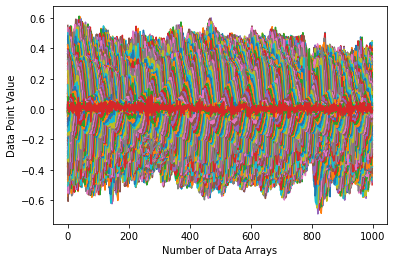

In [2]:
#DATASET
dataframeINPUT = pd.read_excel('Sensor_Measurements.xlsx', sheet_name = 2) #Reads in the input data
dataframeOUTPUT = pd.read_excel('Sensor_Measurements.xlsx', sheet_name = 6) #Reads in the output data
X, Y = dataframeINPUT.to_numpy(), dataframeOUTPUT.to_numpy() #Convert dataframe to a numpy array to allow for sklearn packages
plt.plot(Y)
plt.xlabel("Number of Data Arrays")
plt.ylabel("Data Point Value")
plt.savefig("Original_Complete_Dataset.png")
plt.show() #Plots the original dataset
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.2) #Splits the datasets into a multi-layer perceptron problem

In [3]:
print(Y.shape)
print(X.shape)

(999, 1024)
(999, 1024)


Text(0.5, 1.0, 'Heatmap of Input Data')

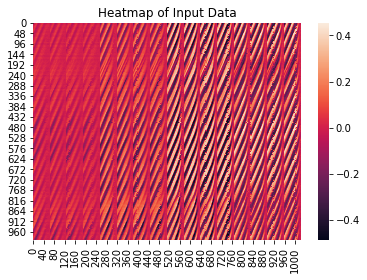

In [4]:
sns.heatmap(X)
plt.title('Heatmap of Input Data')

Text(0.5, 1.0, 'Heatmap of Output Data')

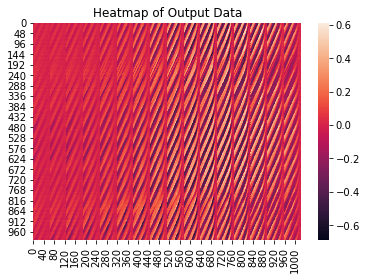

In [5]:
sns.heatmap(Y)
plt.title('Heatmap of Output Data')

In [6]:
in_dim = X.shape[1]
out_dim = Y.shape[1]
dnse_neurons = (2/3 *in_dim) + in_dim
print("input dimension = {}".format(in_dim))
print("output dimension = {}".format(out_dim))
print("number of dense neurons = {}".format(round(dnse_neurons)))

input dimension = 1024
output dimension = 1024
number of dense neurons = 1707


In [7]:
%%time
model = Sequential()
model.add(Dense(in_dim, input_dim=in_dim, activation="relu"))
model.add(Dense(round(dnse_neurons), activation="relu"))
model.add(Dense(round(dnse_neurons), activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
 
model.summary()


history = model.fit(xtest, ytest, epochs=10, validation_split=0.2, shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 1707)              1749675   
                                                                 
 dense_2 (Dense)             (None, 1707)              2915556   
                                                                 
 dense_3 (Dense)             (None, 1024)              1748992   
                                                                 
Total params: 7,463,823
Trainable params: 7,463,823
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 1s 64ms/step - loss: 0.0257 - val_loss: 0.0100
Epoch 2/10
5/5 [==============================] - 0s 46ms/step - loss: 0.0090 - v

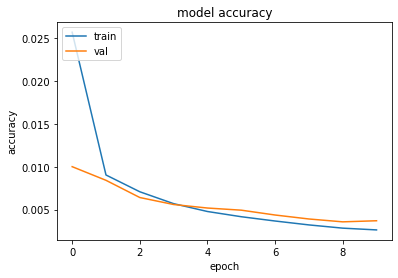

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
%%time
ypred = model.predict(xtest)
np.savetxt("Predictions.csv", ypred, delimiter=",")
MSE_Values = []
MSE_Index = []
for MSE in list(range(0,200)):
    MSE_Index.append("y{}".format(MSE+1))
    MSE_Values.append(mean_squared_error(ytest[:,MSE], ypred[:,MSE]))
MSE_Output = {'y':MSE_Index, 'Value':MSE_Values}
df = pd.DataFrame(MSE_Output)
df.to_csv("MSE_Output.csv")
print(ypred.shape)

(200, 1024)
Wall time: 311 ms


Text(0.5, 1.0, 'Heatmap of Predicted Data')

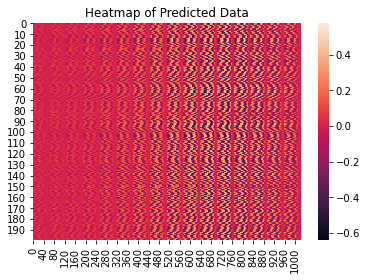

In [10]:
sns.heatmap(ypred)
plt.title('Heatmap of Predicted Data') # title with fontsize 20

Text(0.5, 1.0, 'Heatmap of Validation Data')

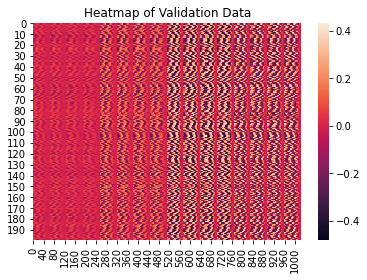

In [11]:
sns.heatmap(xtest)
plt.title('Heatmap of Validation Data')

range(0, 200)
(201,)


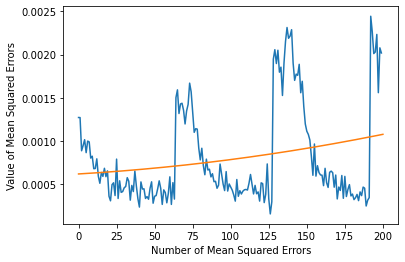

In [12]:
#PRINT MSE FOR DIFFERENT OPTIMIZERS AFTER EXPLAINING WHY MSE OVER MAE etc
#USE THAT MSE OUTPUT TO MAKE A GRAPH OF ERROR TO MAKE A JUDGEMENT OF WHICH IS BEST TO USE
x_ax = range(len(xtest))
print(x_ax)
x = np.linspace(0,200,201)
print(x.shape)
plt.plot(x_ax, MSE_Values, label ="Mean Squared Error")
a,b,c = np.polyfit(x_ax, MSE_Values,2)

plt.plot(x, a*((x)**2)+(b*x)+c,  label="line with marker")#label = "Trend Line"
plt.xlabel("Number of Mean Squared Errors")
plt.ylabel("Value of Mean Squared Errors")
plt.savefig("Mean Squared Error of Model.png")
plt.show()

In [13]:
def arrmse(predictions, targets):
    return sum(np.sqrt(sum((targets - predictions) ** 2)/sum((targets - np.mean(targets)) ** 2)))/(100*len(targets))
print("The average root mean squared eror is {}".format(arrmse(ypred,xtest)))
print("The r2 score is {}".format(r2_score(Y[0:200], ypred))) # doesn't take into account overfitting, this is why the contour, MAE and MSE results are different from r2
print("The mean absolute error is {}".format(mean_absolute_error(Y[0:200], ypred)))

The average root mean squared eror is 0.038003053031628216
The r2 score is -1.6252221753018865e+32
The mean absolute error is 0.16800172078967324


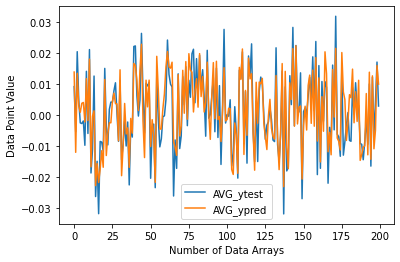

In [14]:
x_ax = range(len(xtest))
avg_test = []
avg_pred = []
for avg in list(range(0,200)):
    avg_test.append(sum(ytest[avg][:])/len(ytest[avg][:]))
    avg_pred.append(sum(ypred[avg][:])/len(ypred[avg][:]))
plt.plot(x_ax, avg_test, label = "AVG_ytest")
plt.plot(x_ax, avg_pred, label = "AVG_ypred")
plt.legend()
plt.xlabel("Number of Data Arrays")
plt.ylabel("Data Point Value")
plt.savefig("AVG_Predicted_vs_AVG_Test.png")
plt.show()

(200, 1024)
(200, 1024)
(200, 1024)
Wall time: 325 ms


Text(0.5, 1.0, 'Validation')

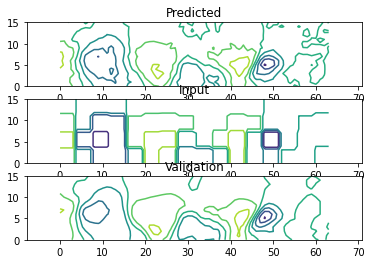

In [15]:
%%time
ypred = model.predict(xtest)
np.savetxt("Predictions.csv", ypred, delimiter=",")
MSE_Values = []
MSE_Index = []
for MSE in list(range(0,400)):
    MSE_Index.append("y{}".format(MSE+1))
    MSE_Values.append(mean_squared_error(ytest[:,MSE], ypred[:,MSE]))
MSE_Output = {'y':MSE_Index, 'Value':MSE_Values}
df = pd.DataFrame(MSE_Output)
df.to_csv("MSE_Output.csv")
print(xtest.shape)
print(ytest.shape)
print(ypred.shape)

jj = ypred[150,:]
kk = np.reshape(jj,(16,64))
ll = xtest[150,:]
mm = np.reshape(ll,(16,64))
nn = ytest[150,:]
oo = np.reshape(nn,(16,64))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.contour(np.flipud(kk))
#plt.ylabel('Validation Data')
ax1.axis('equal')
ax2.contour(np.flipud(mm))
#plt.ylabel('Input Data')
ax2.axis('equal')
ax3.contour(np.flipud(oo))
#plt.ylabel('Input Data')
ax3.axis('equal')

ax1.set_title('Predicted')
ax2.set_title('Input')
ax3.set_title('Validation')